In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from alphatims import bruker

In [323]:
dia_pasef_paths = ['/Users/georgwallmann/Documents/data/alphadia_runs/2023_02_12_diaPASEF_vs_synchroPASEF/diaPASEF/alpha_psms_0_2.tsv',
                    '/Users/georgwallmann/Documents/data/alphadia_runs/2023_02_12_diaPASEF_vs_synchroPASEF/diaPASEF/alpha_psms_2_4.tsv']
dia_pasef_df = pd.concat([pd.read_csv(path, sep='\t') for path in dia_pasef_paths])

synchro_pasef_path = ['/Users/georgwallmann/Documents/data/alphadia_runs/2023_02_12_diaPASEF_vs_synchroPASEF/synchroPASEF/alpha_psms_4_6.tsv',
                    '/Users/georgwallmann/Documents/data/alphadia_runs/2023_02_12_diaPASEF_vs_synchroPASEF/synchroPASEF/alpha_psms_6_8.tsv']

synchro_pasef_df = pd.concat([pd.read_csv(path, sep='\t') for path in synchro_pasef_path])

In [330]:
dia_pasef_summary = dia_pasef_df[(dia_pasef_df['qval'] <= 0.01)&(dia_pasef_df['decoy'] == 0)]
synchro_pasef_summary = synchro_pasef_df[(synchro_pasef_df['qval'] <= 0.01)&(synchro_pasef_df['decoy'] == 0)]

dia_pasef_precursors = dia_pasef_summary.groupby('run').agg({'precursor_idx': 'nunique', 'proteins': 'nunique'})
dia_pasef_precursors['method'] = 'diaPASEF'
synchro_pasef_precursors = synchro_pasef_summary.groupby('run').agg({'precursor_idx': 'nunique', 'proteins': 'nunique'})
synchro_pasef_precursors['method'] = 'synchroPASEF'

precursors = pd.concat([dia_pasef_precursors, synchro_pasef_precursors])


In [351]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

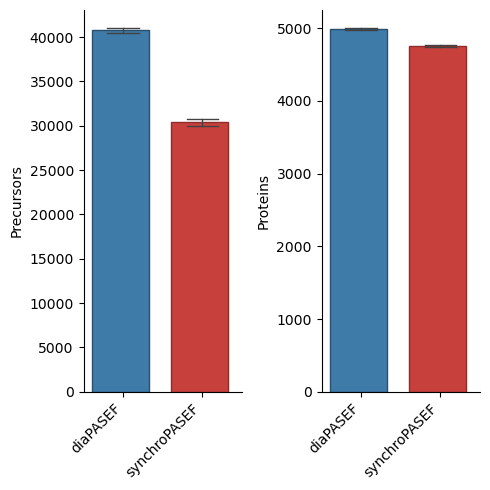

In [359]:
blues = ['#084285', '#2d7dbb', '#3c8bc2', '#539fcd', '#a3cbe2'] 
reds = ['#7d040f','#de2a25', '#e66a6a', '#e98a8a', '#fcd5c2']

fig, axs = plt.subplots(1, 2, figsize=(5, 5))

sns.barplot(precursors, x='method', y='precursor_idx', ax=axs[0], capsize=.4, linewidth=1, edgecolor=".5", errwidth=1, palette=[blues[1], reds[1]])
sns.barplot(precursors, x='method', y='proteins', ax=axs[1], capsize=.4, linewidth=1, edgecolor=".5", errwidth=1, palette=[blues[1], reds[1]])

axs[0].set_ylabel('Precursors')
axs[1].set_ylabel('Proteins')

axs[0].set_xlabel('')
axs[1].set_xlabel('')

# rotate x labels to 45 degreees
#align right
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xlabel('')

# remove top and righht spine
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for patch in ax.patches:
        clr = patch.get_facecolor()
        patch.set_edgecolor(lighten_color(clr, 1.3))
        w = patch.get_width()
        patch.set_width(w*0.9)

fig.tight_layout()

fig.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/precursors_proteins.png', dpi=300)


In [112]:
dia_pasef_data = bruker.TimsTOF('/Users/georgwallmann/Documents/data/raw_data/Alpha_dia_benchmarking/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A1_1_500.d')
synchro_pasef_data = bruker.TimsTOF('/Users/georgwallmann/Documents/data/raw_data/Alpha_dia_benchmarking/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_SyP_classical_5bins_S2-A1_1_449.d')

100%|██████████| 11010/11010 [00:04<00:00, 2341.54it/s]


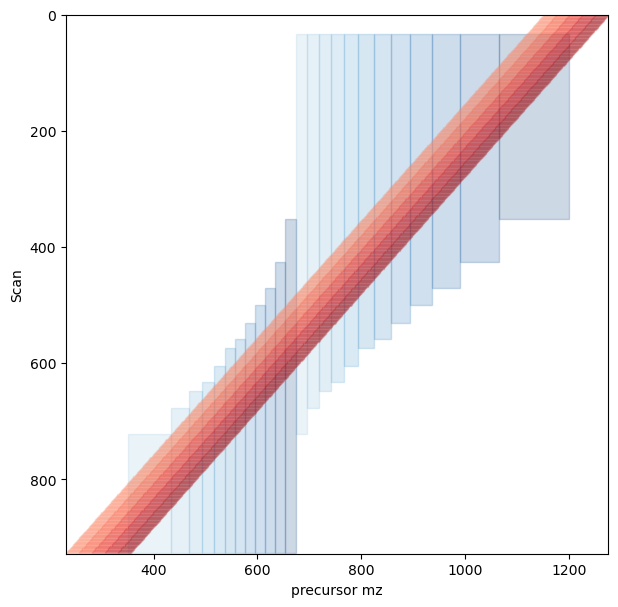

In [313]:
fig, ax = plt.subplots(figsize=(7,7))

plotting.plot_dia_cycle(dia_pasef_data.cycle, ax=ax, cmap_name='Blues', alpha=0.2, )
plotting.plot_dia_cycle(synchro_pasef_data.cycle, ax=ax, cmap_name='Reds', alpha=0.2, )

ax.set_xlabel('precursor mz')

plt.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/cycle_overlay.png')


In [4]:
from alphadia.extraction.calibration import density_scatter

In [114]:
run_names = synchro_pasef_df['run'].unique()
run_names

array(['20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_SyP_classical_5bins_S2-A1_1_449',
       '20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_SyP_classical_5bins_S2-A2_1_453'],
      dtype=object)

In [ ]:
plot_dia_cycle

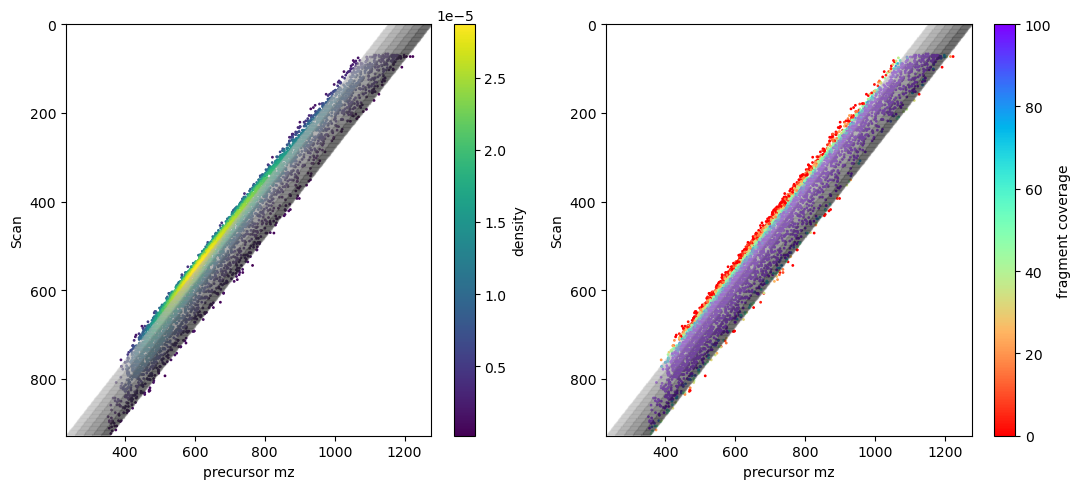

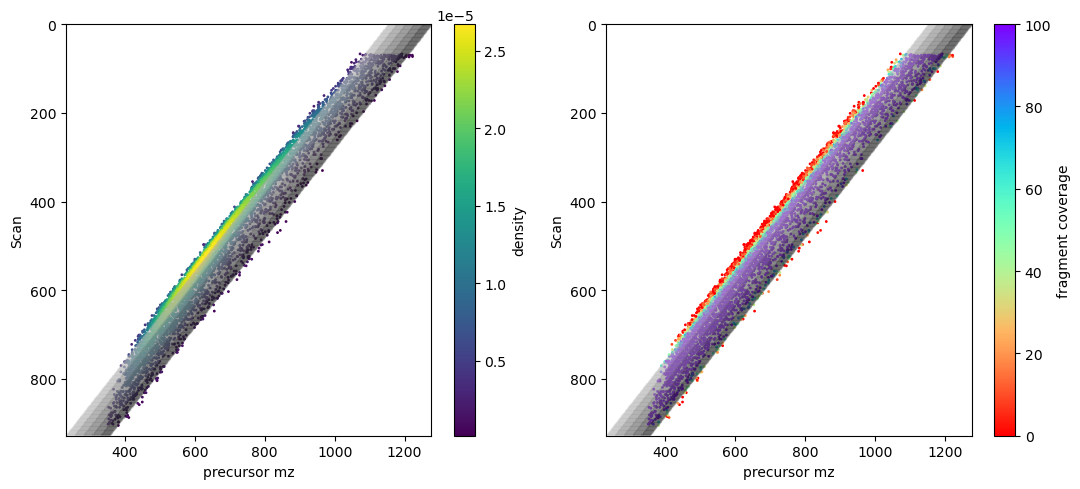

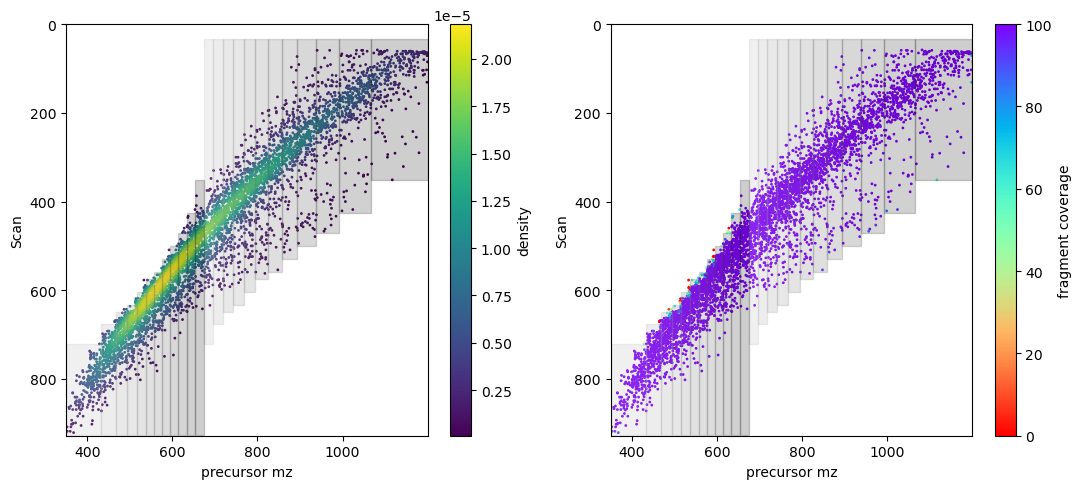

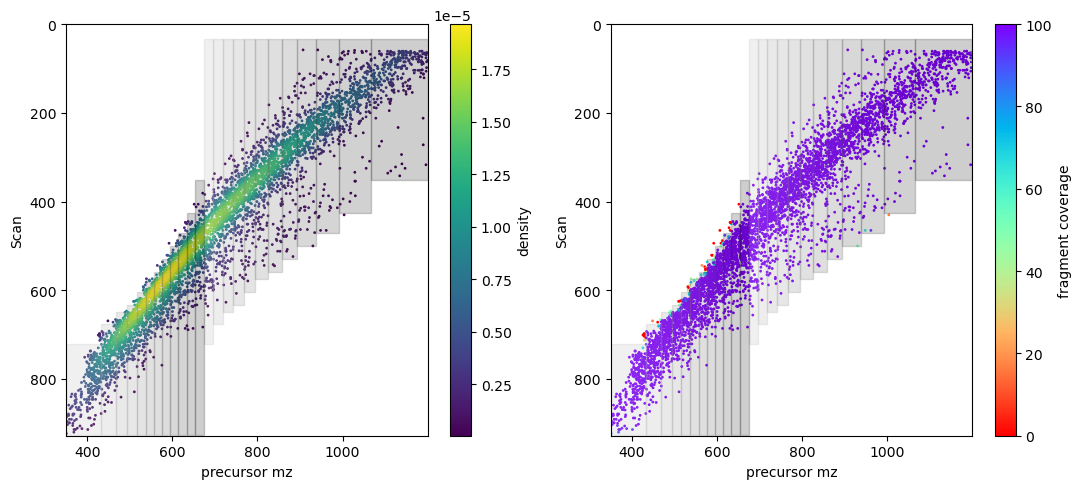

In [322]:
from alphadia.extraction import plotting


for run in synchro_pasef_df['run'].unique():
    df = synchro_pasef_df[synchro_pasef_df['run'] == run].sample(5000)
    
    fig, axs = plt.subplots(1, 2, figsize=(11, 5))
    
    density_scatter(df['mz_observed'].values, len(synchro_pasef_data.mobility_values) - np.searchsorted(synchro_pasef_data.mobility_values[::-1],df['mobility_observed'].values), s=1, axis=axs[0])
    plotting.plot_dia_cycle(synchro_pasef_data.cycle[:,], ax=axs[0], cmap_name='Greys', alpha=0.2, )

    axs[1].scatter(df['mz_observed'].values, len(synchro_pasef_data.mobility_values) - np.searchsorted(synchro_pasef_data.mobility_values[::-1],df['mobility_observed'].values), c=df['fragment_coverage'].values*100, s=1, cmap='rainbow_r', vmin=0.0, vmax=100)
    plotting.plot_dia_cycle(synchro_pasef_data.cycle[:,], ax=axs[1], cmap_name='Greys', alpha=0.2, )
    # show color bar
    fig.colorbar(axs[0].collections[0], ax=axs[0], label='density')
    fig.colorbar(axs[1].collections[0], ax=axs[1], label='fragment coverage')


    axs[0].set_xlabel('precursor mz')
    axs[1].set_xlabel('precursor mz')

    fig.tight_layout()
    plt.savefig(f'/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/{run}.png')
    plt.show()

for run in dia_pasef_df['run'].unique():
    df = dia_pasef_df[dia_pasef_df['run'] == run].sample(5000)

    fig, axs = plt.subplots(1, 2, figsize=(11, 5))

    density_scatter(df['mz_observed'].values, len(dia_pasef_data.mobility_values) - np.searchsorted(dia_pasef_data.mobility_values[::-1],df['mobility_observed'].values), s=1, axis=axs[0])
    plotting.plot_dia_cycle(dia_pasef_data.cycle[:,], ax=axs[0], cmap_name='Greys', alpha=0.2, )

    axs[1].scatter(df['mz_observed'].values, len(dia_pasef_data.mobility_values) - np.searchsorted(dia_pasef_data.mobility_values[::-1],df['mobility_observed'].values), c=df['fragment_coverage'].values*100, s=1, cmap='rainbow_r', vmin=0.0, vmax=100)
    plotting.plot_dia_cycle(dia_pasef_data.cycle[:,], ax=axs[1], cmap_name='Greys', alpha=0.2, )
    # show color bar
    fig.colorbar(axs[0].collections[0], ax=axs[0], label='density')
    fig.colorbar(axs[1].collections[0], ax=axs[1], label='fragment coverage')


    axs[0].set_xlabel('precursor mz')
    axs[1].set_xlabel('precursor mz')

    fig.tight_layout()
    plt.savefig(f'/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/{run}.png')
    plt.show()

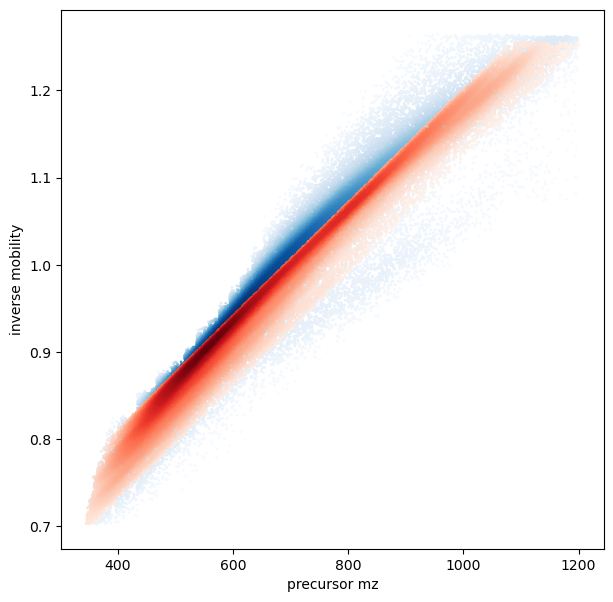

In [312]:
fig, ax = plt.subplots(figsize=(7,7))

run = dia_pasef_df['run'].unique()[0]
df = dia_pasef_df[dia_pasef_df['run'] == run]
df = df[df['qval'] < 0.01]
df = df[df['fragment_coverage'] > 0.5]
density_scatter(df['mz_observed'].values, df['mobility_observed'].values, s=1, axis=ax, cmap='Blues')

run = synchro_pasef_df['run'].unique()[0]
df = synchro_pasef_df[synchro_pasef_df['run'] == run]
df = df[df['qval'] < 0.01]
df = df[df['fragment_coverage'] > 0.5]
density_scatter(df['mz_observed'].values, df['mobility_observed'].values, s=1, axis=ax, cmap='Reds')

ax.set_ylabel('inverse mobility')
ax.set_xlabel('precursor mz')

plt.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/density_overlay.png')
   

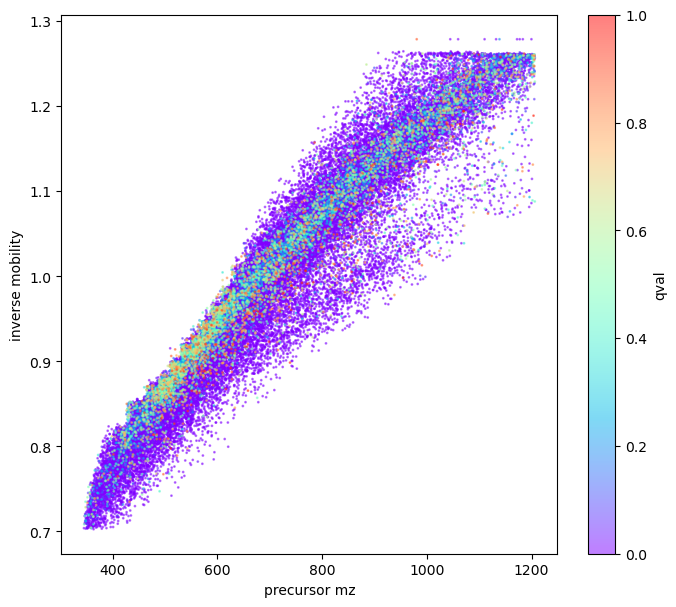

In [365]:
fig, ax = plt.subplots(figsize=(8,7))

run = dia_pasef_df['run'].unique()[0]
df = dia_pasef_df[dia_pasef_df['run'] == run]
df = df[df['decoy'] == 0]
#df = df[df['fragment_coverage'] >]

ax.scatter(df['mz_observed'].values, df['mobility_observed'].values, s=1, c=df['qval'].values, cmap='rainbow', alpha=0.5, vmin=0.0, vmax=1)
fig.colorbar(ax.collections[0], ax=ax, label='qval')

ax.set_ylabel('inverse mobility')
ax.set_xlabel('precursor mz')

plt.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/qval_dist_diaPASEF.png')

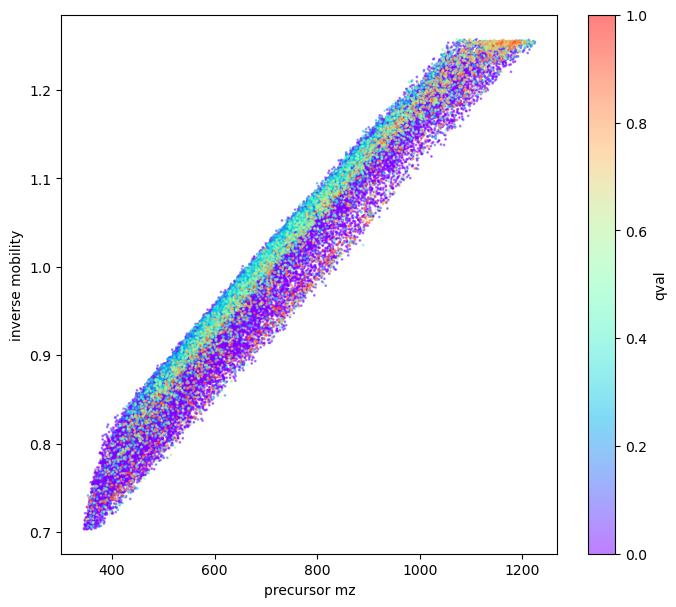

In [366]:
fig, ax = plt.subplots(figsize=(8,7))

run = synchro_pasef_df['run'].unique()[0]
df = synchro_pasef_df[synchro_pasef_df['run'] == run]
df = df[df['decoy'] == 0]

ax.scatter(df['mz_observed'].values, df['mobility_observed'].values, s=1, c=df['qval'].values, cmap='rainbow', alpha=0.5, vmin=0.0, vmax=1)
fig.colorbar(ax.collections[0], ax=ax, label='qval')

ax.set_ylabel('inverse mobility')
ax.set_xlabel('precursor mz')

plt.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/qval_dist_synchroPASEF.png')

In [304]:
synchro_pasef_run = synchro_pasef_df['run'].unique()[0]
df = synchro_pasef_df[synchro_pasef_df['run'] == synchro_pasef_run]
df = df[df['decoy'] == 0]
df = df[df['fragment_coverage'] > 0.25]
p_idx = df['precursor_idx'].unique()

len(p_idx)

40167

In [305]:
dia_pasef_run = dia_pasef_df['run'].unique()[0]
synchro_pasef_run = synchro_pasef_df['run'].unique()[0]

dpdf = dia_pasef_df[(dia_pasef_df['run'] == dia_pasef_run) & (dia_pasef_df['precursor_idx'].isin(p_idx))].copy()
dpdf.sort_values('qval', inplace=True)
dpdf['count'] = np.arange(len(dpdf))

#dpdf['method'] = 'dia_pasef'
spdf = synchro_pasef_df[(synchro_pasef_df['run'] == synchro_pasef_run) & (synchro_pasef_df['precursor_idx'].isin(p_idx))].copy()
spdf.sort_values('qval', inplace=True)
spdf['count'] = np.arange(len(spdf))

print(len(dpdf), len(spdf))
#spdf['method'] = 'synchro_pasef'
#combined_df = pd.concat([dpdf, spdf])

40109 40167


In [306]:
spdf

,precursor_idx,elution_group_idx,charge,precursor_mass_error,mz_library,mz_observed,precursor_isotope_correlation,sum_precursor_intensity,n_fragments_matched,n_fragments,...,rt_calibrated,rt_error,mobility_library,mobility_calibrated,mobility_error,proteins,proba,qval,run,count
0,0,0,3,0.899849,905.723854,905.723511,0.998690,2.399241,12.0,12.0,...,951.824471,-1.986336,1.136877,1.119662,0.003829,O75822,0.015782,0.000000,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...,0
835,52183,26419,3,-0.408085,693.682447,693.680969,0.999107,2.255894,12.0,12.0,...,683.326739,-0.452288,0.989654,0.979134,-0.000470,Q9H9Y2,0.015782,0.000000,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...,1
834,52181,26418,2,-0.205788,1040.020032,1040.018311,0.990625,2.126600,11.0,12.0,...,683.033640,-0.159189,1.242439,1.221867,0.000547,Q9H9Y2,0.015782,0.000000,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...,2
833,52085,26369,2,1.672727,949.464224,949.464539,0.996899,2.083973,11.0,12.0,...,1020.902490,-3.120264,1.182267,1.163468,0.002049,O60333,0.015782,0.000000,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...,3
832,52099,26376,2,-0.241704,671.822941,671.821533,0.999772,2.600196,12.0,12.0,...,425.023425,0.490766,0.972014,0.962486,-0.005159,Q14137,0.015782,0.000000,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90953,5951,3001,3,3.610964,861.755327,861.757324,-0.073928,1.801391,3.0,12.0,...,1136.524047,-22.660155,1.031062,1.018298,0.028254,O60306,0.963531,0.928912,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...,40162
90956,54997,27866,5,1.635365,836.397195,836.397461,-0.745926,1.620993,7.0,12.0,...,970.385138,50.142084,1.064827,1.050446,0.028433,P05556,0.963745,0.928935,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...,40163
90966,74178,37629,2,-6.674153,1018.971987,1018.963745,0.929937,1.926932,3.0,12.0,...,349.678722,49.069477,1.166934,1.148647,0.022042,Q8N4V1,0.964967,0.929106,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...,40164
90974,21844,11041,4,-3.264307,1074.994694,1074.989502,-0.148275,1.449340,2.0,12.0,...,1053.096753,-33.941968,1.174390,1.155851,0.028416,Q9BQE3,0.965580,0.929235,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...,40165


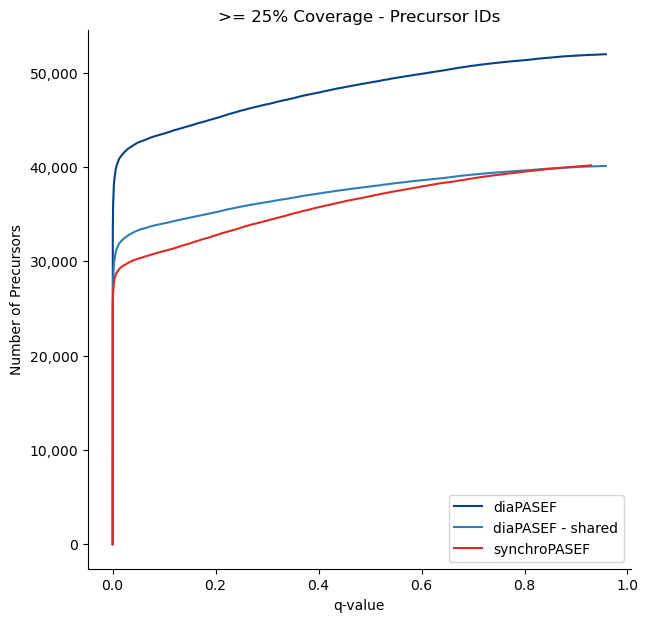

In [360]:
fig, ax = plt.subplots(figsize=(7,7))

all_dia_pasef = dia_pasef_df[(dia_pasef_df['run'] == dia_pasef_run) & (dia_pasef_df['decoy'] == 0)].copy()
all_dia_pasef.sort_values('qval', inplace=True)
all_dia_pasef['count'] = np.arange(len(all_dia_pasef))

plt.plot(all_dia_pasef['qval'].values, all_dia_pasef['count'].values, label='diaPASEF', color='#084285')
plt.plot(dpdf['qval'].values, dpdf['count'].values, label='diaPASEF - shared', color='#2d7dbb')
plt.plot(spdf['qval'].values, spdf['count'].values, label='synchroPASEF', color='#de2a25')

plt.xlabel('q-value')
plt.ylabel('Number of Precursors')

# disable top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# format y axis with thousands separator
import matplotlib.ticker
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#plt.plot([0., 1], [47000, 47000], color='black', linestyle='--', linewidth=1)
plt.legend(loc = 'lower right')

plt.title('>= 25% Coverage - Precursor IDs')
plt.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/precursor_ids.png')

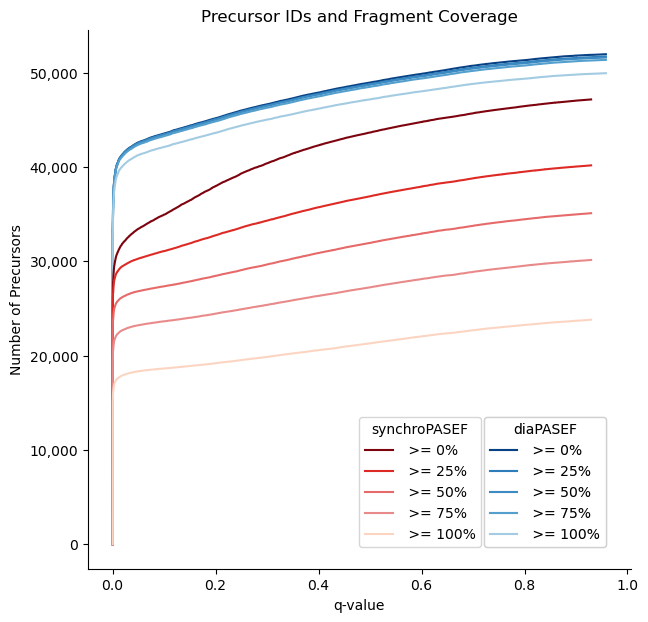

In [361]:
fig, ax = plt.subplots(figsize=(7,7))

d_legend = []

for cutoff, blue, red in zip([0, 0.25, 0.5, 0.75, 1], ['#084285', '#2d7dbb', '#3c8bc2', '#539fcd', '#a3cbe2'], ['#7d040f','#de2a25', '#e66a6a', '#e98a8a', '#fcd5c2']):
    dpdf = dia_pasef_df[(dia_pasef_df['run'] == dia_pasef_run) & (dia_pasef_df['decoy'] == 0)].copy()
    dpdf = dpdf[dpdf['fragment_coverage'] >= cutoff]
    dpdf.sort_values('qval', inplace=True)
    dpdf['count'] = np.arange(len(dpdf))

    line, = ax.plot(dpdf['qval'].values, dpdf['count'].values, label=f'>= {cutoff:.2f}', color=blue)
    
    d_legend += [line]

s_legend = []

for cutoff, blue, red in zip([0, 0.25, 0.5, 0.75, 1], ['#084285', '#2d7dbb', '#3c8bc2', '#539fcd', '#a3cbe2'], ['#7d040f','#de2a25', '#e66a6a', '#e98a8a', '#fcd5c2']):

    spdf = synchro_pasef_df[(synchro_pasef_df['run'] == synchro_pasef_run) & (synchro_pasef_df['decoy'] == 0)].copy()
    spdf = spdf[spdf['fragment_coverage'] >= cutoff]
    spdf.sort_values('qval', inplace=True)
    spdf['count'] = np.arange(len(spdf))

    line, = ax.plot(spdf['qval'].values, spdf['count'].values, label=f'>= {cutoff:.2f}', color=red)

    s_legend += [line]

legend1 = plt.legend(s_legend, [ f' >= {el}%' for el in [0, 25, 50, 75, 100]], loc=(0.50,0.04), title='synchroPASEF')
legend2 = plt.legend(d_legend, [ f' >= {el}%' for el in [0, 25, 50, 75, 100]], loc=(0.73,0.04), title='diaPASEF')

ax.add_artist(legend1)
ax.add_artist(legend2)

plt.xlabel('q-value')
plt.ylabel('Number of Precursors')

# disable top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# format y axis with thousands separator
import matplotlib.ticker
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Precursor IDs and Fragment Coverage')
plt.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/precursor_ids_fragment_coverage.png')


In [271]:
dia

NameError: name 'dia' is not defined

In [59]:
df['mobility_observed'].values

array([0.96314657, 1.15129316, 1.11314654, ..., 0.96896553, 0.88362068,
       0.95409483])

In [92]:
synchro_pasef_data.mobility_values

array([1.3       , 1.29935345, 1.2987069 , 1.29806034, 1.29741379,
       1.29676724, 1.29612069, 1.29547414, 1.29482759, 1.29418103,
       1.29353448, 1.29288793, 1.29224138, 1.29159483, 1.29094828,
       1.29030172, 1.28965517, 1.28900862, 1.28836207, 1.28771552,
       1.28706897, 1.28642241, 1.28577586, 1.28512931, 1.28448276,
       1.28383621, 1.28318966, 1.2825431 , 1.28189655, 1.28125   ,
       1.28060345, 1.2799569 , 1.27931034, 1.27866379, 1.27801724,
       1.27737069, 1.27672414, 1.27607759, 1.27543103, 1.27478448,
       1.27413793, 1.27349138, 1.27284483, 1.27219828, 1.27155172,
       1.27090517, 1.27025862, 1.26961207, 1.26896552, 1.26831897,
       1.26767241, 1.26702586, 1.26637931, 1.26573276, 1.26508621,
       1.26443966, 1.2637931 , 1.26314655, 1.2625    , 1.26185345,
       1.2612069 , 1.26056034, 1.25991379, 1.25926724, 1.25862069,
       1.25797414, 1.25732759, 1.25668103, 1.25603448, 1.25538793,
       1.25474138, 1.25409483, 1.25344828, 1.25280172, 1.25215

In [100]:
mz_list = dia_pasef_df['mz_library'].head(10).values
mobility_list = dia_pasef_df['mobility_library'].head(10).values

In [101]:
for mz, mobility in zip(mz_list, mobility_list):
    print(mz, mobility)

666.3171104186533 0.9694406100571762
895.0808291504901 1.010210815682178
816.915026574705 1.0747870734026022
694.880258518185 1.0650131474368956
681.3930017545299 1.0676491705756068
794.909547271105 1.1256728407538863
883.95362042164 1.160553613804536
727.6784180434735 0.9305758054838248
695.0129609864167 1.0035880666499142
697.0094394250734 0.920834714098166
